In [10]:
# Read the machine_temp_failure_missing.csv dataset into a Pandas DataFrame, must use PathLib. Inspect the dataset, and look for missing values if there are any. Find statistics such as mean, max, min. Rename the value column to temperature. 
from pathlib import Path
import pandas as pd
given_file = Path("machine_temp_failure_missing.csv")
df = pd.read_csv(given_file)
print(df)  
print(df.info()) 
df.rename(columns={"value": "temperature"}, inplace=True)
statistics = df.describe()
print(statistics[['temperature']])#in the given output count is nonmissing number of values

              timestamp      value
0      02-12-2013 21:15  73.967322
1      02-12-2013 21:20  74.935882
2      02-12-2013 21:25  76.124162
3      02-12-2013 21:30  78.140707
4      02-12-2013 21:35  79.329836
...                 ...        ...
22690  19-02-2014 15:05  98.185415
22691  19-02-2014 15:10  97.804168
22692  19-02-2014 15:15  97.135468
22693  19-02-2014 15:20  98.056852
22694  19-02-2014 15:25  96.903861

[22695 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      21410 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB
None
        temperature
count  21410.000000
mean      85.968188
std       13.553070
min        2.084721
25%       83.082867
50%       89.251290
75%       93.910748
max      108.510543


In [11]:
# Create a new feature delta_temperature which would be temp[i+1] - temp[i] where i is in range(Index). The feature represents the difference between consecutive temperature values
from pathlib import Path
import pandas as pd
given_file = Path("machine_temp_failure_missing.csv")
df.rename(columns={"value": "temperature"}, inplace=True)
df['delta_temperature'] = df['temperature'].diff()
print(df)

              timestamp  temperature  delta_temperature
0      02-12-2013 21:15    73.967322                NaN
1      02-12-2013 21:20    74.935882           0.968560
2      02-12-2013 21:25    76.124162           1.188280
3      02-12-2013 21:30    78.140707           2.016546
4      02-12-2013 21:35    79.329836           1.189128
...                 ...          ...                ...
22690  19-02-2014 15:05    98.185415                NaN
22691  19-02-2014 15:10    97.804168          -0.381246
22692  19-02-2014 15:15    97.135468          -0.668700
22693  19-02-2014 15:20    98.056852           0.921384
22694  19-02-2014 15:25    96.903861          -1.152991

[22695 rows x 3 columns]


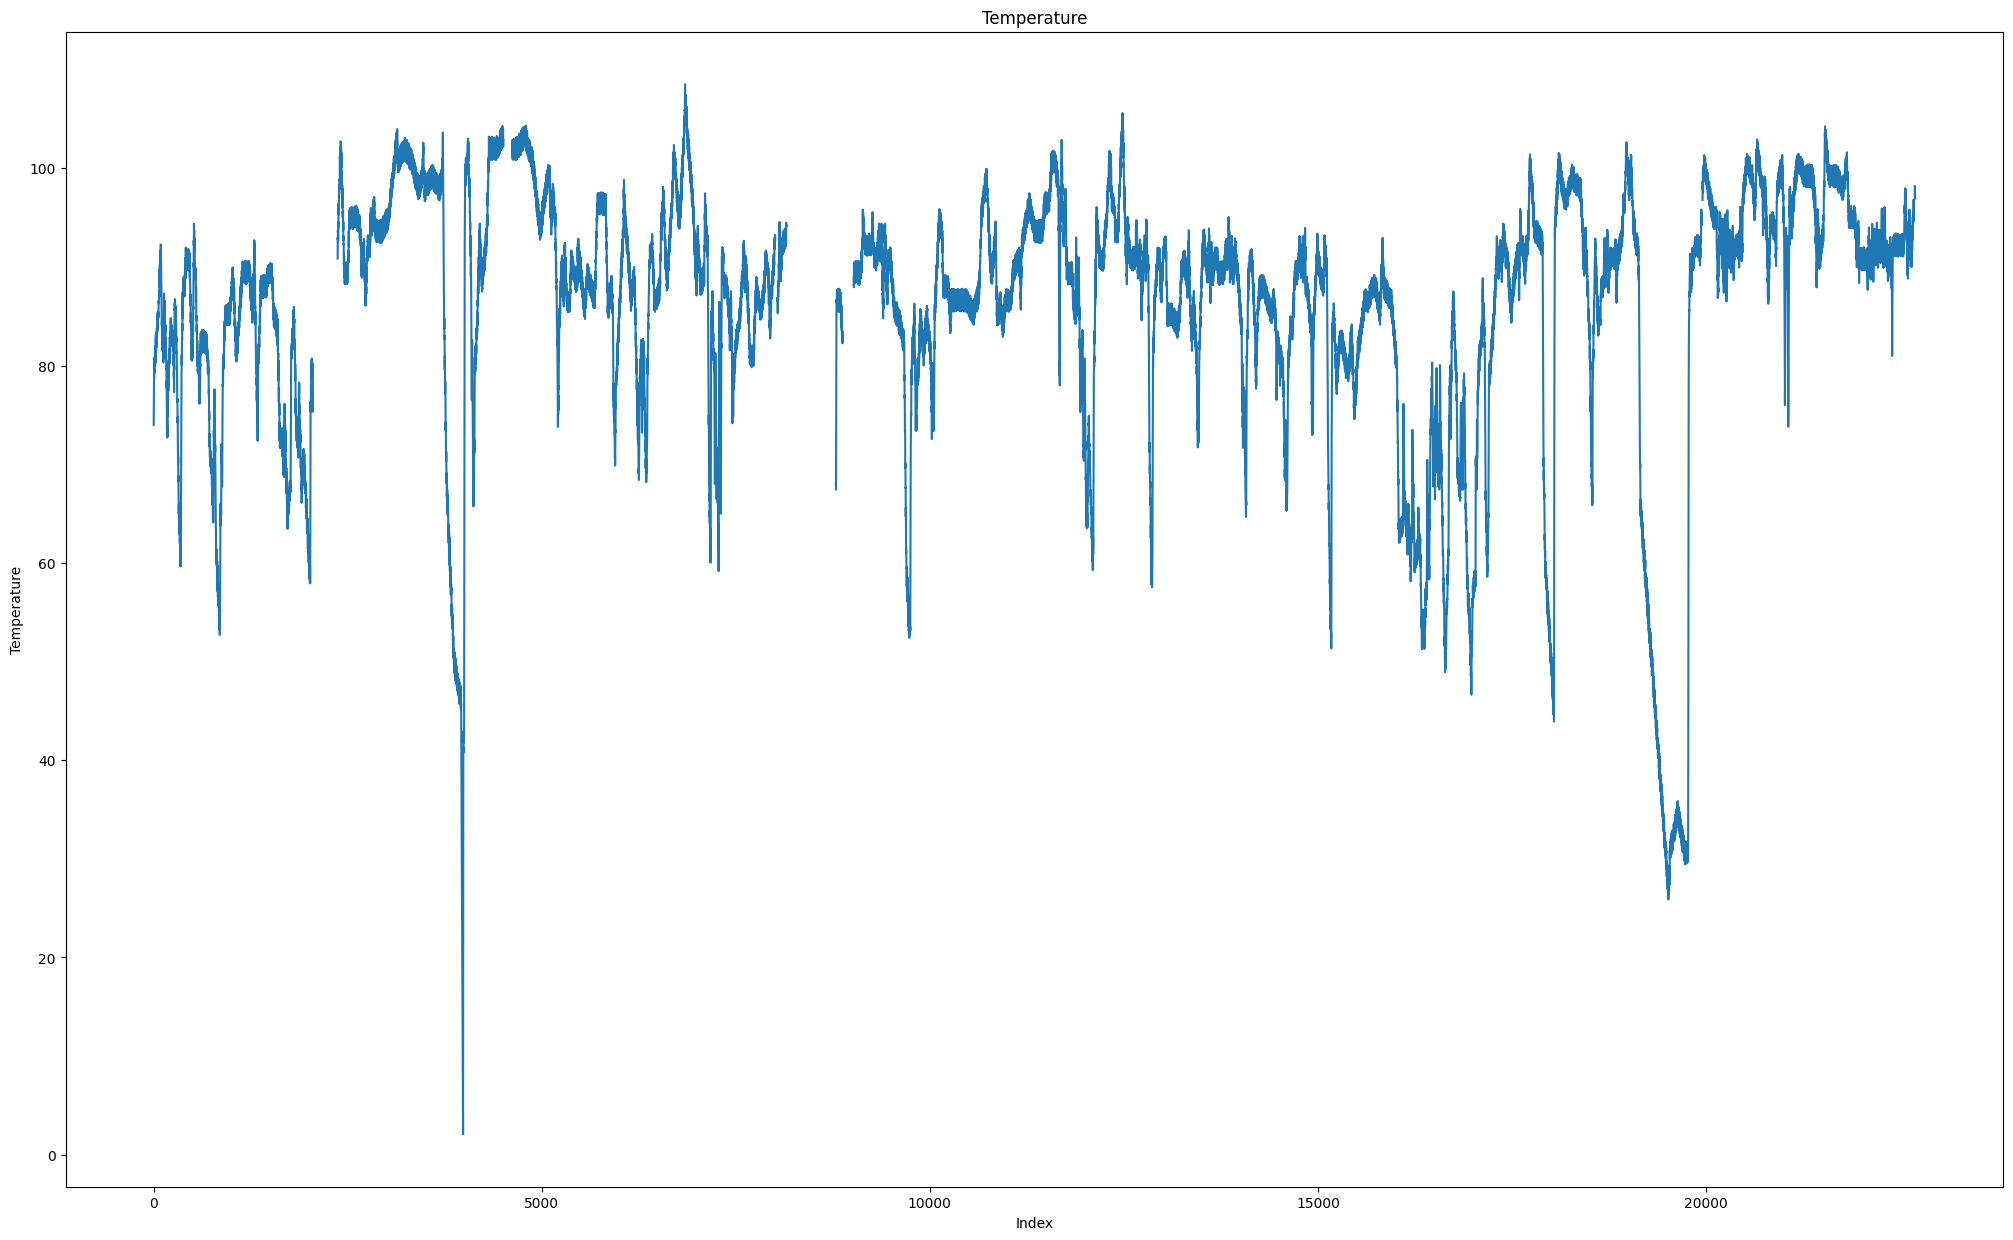

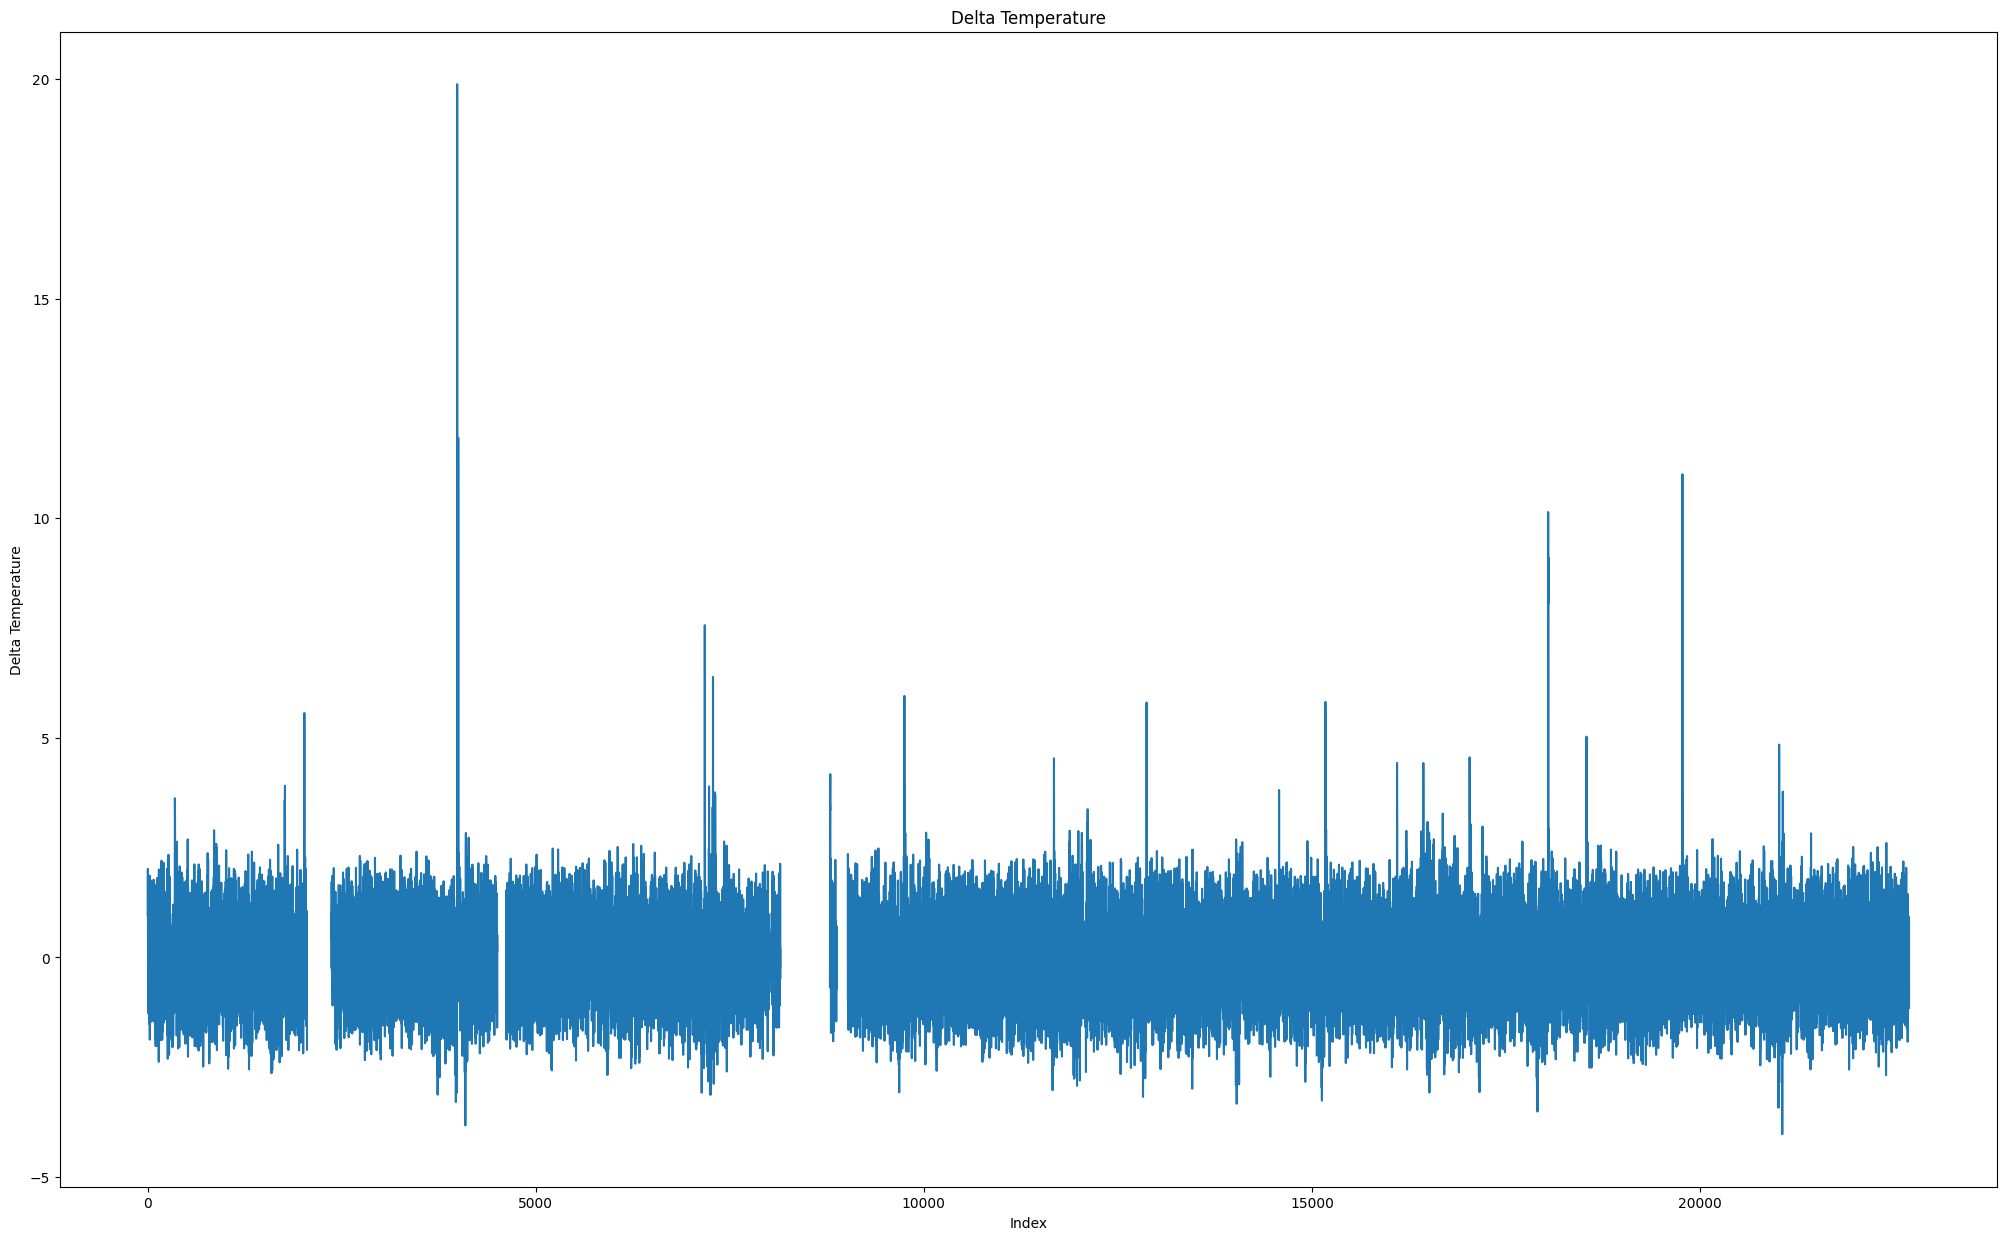

In [12]:
# Generate two separate plots for temperature and delta_temperature using both matplotlib and hvPlot
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
file_path = Path("machine_temp_failure_missing.csv")
df = pd.read_csv(file_path)
df.rename(columns={"value": "temperature"}, inplace=True)
df['delta_temperature'] = df['temperature'].diff()
plt.figure(figsize=(25, 15))
plt.plot(df.index, df['temperature'])
plt.title('Temperature')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.show()
plt.figure(figsize=(25, 15))
plt.plot(df.index, df['delta_temperature'])
plt.title('Delta Temperature')
plt.xlabel('Index')
plt.ylabel('Delta Temperature')
plt.show()



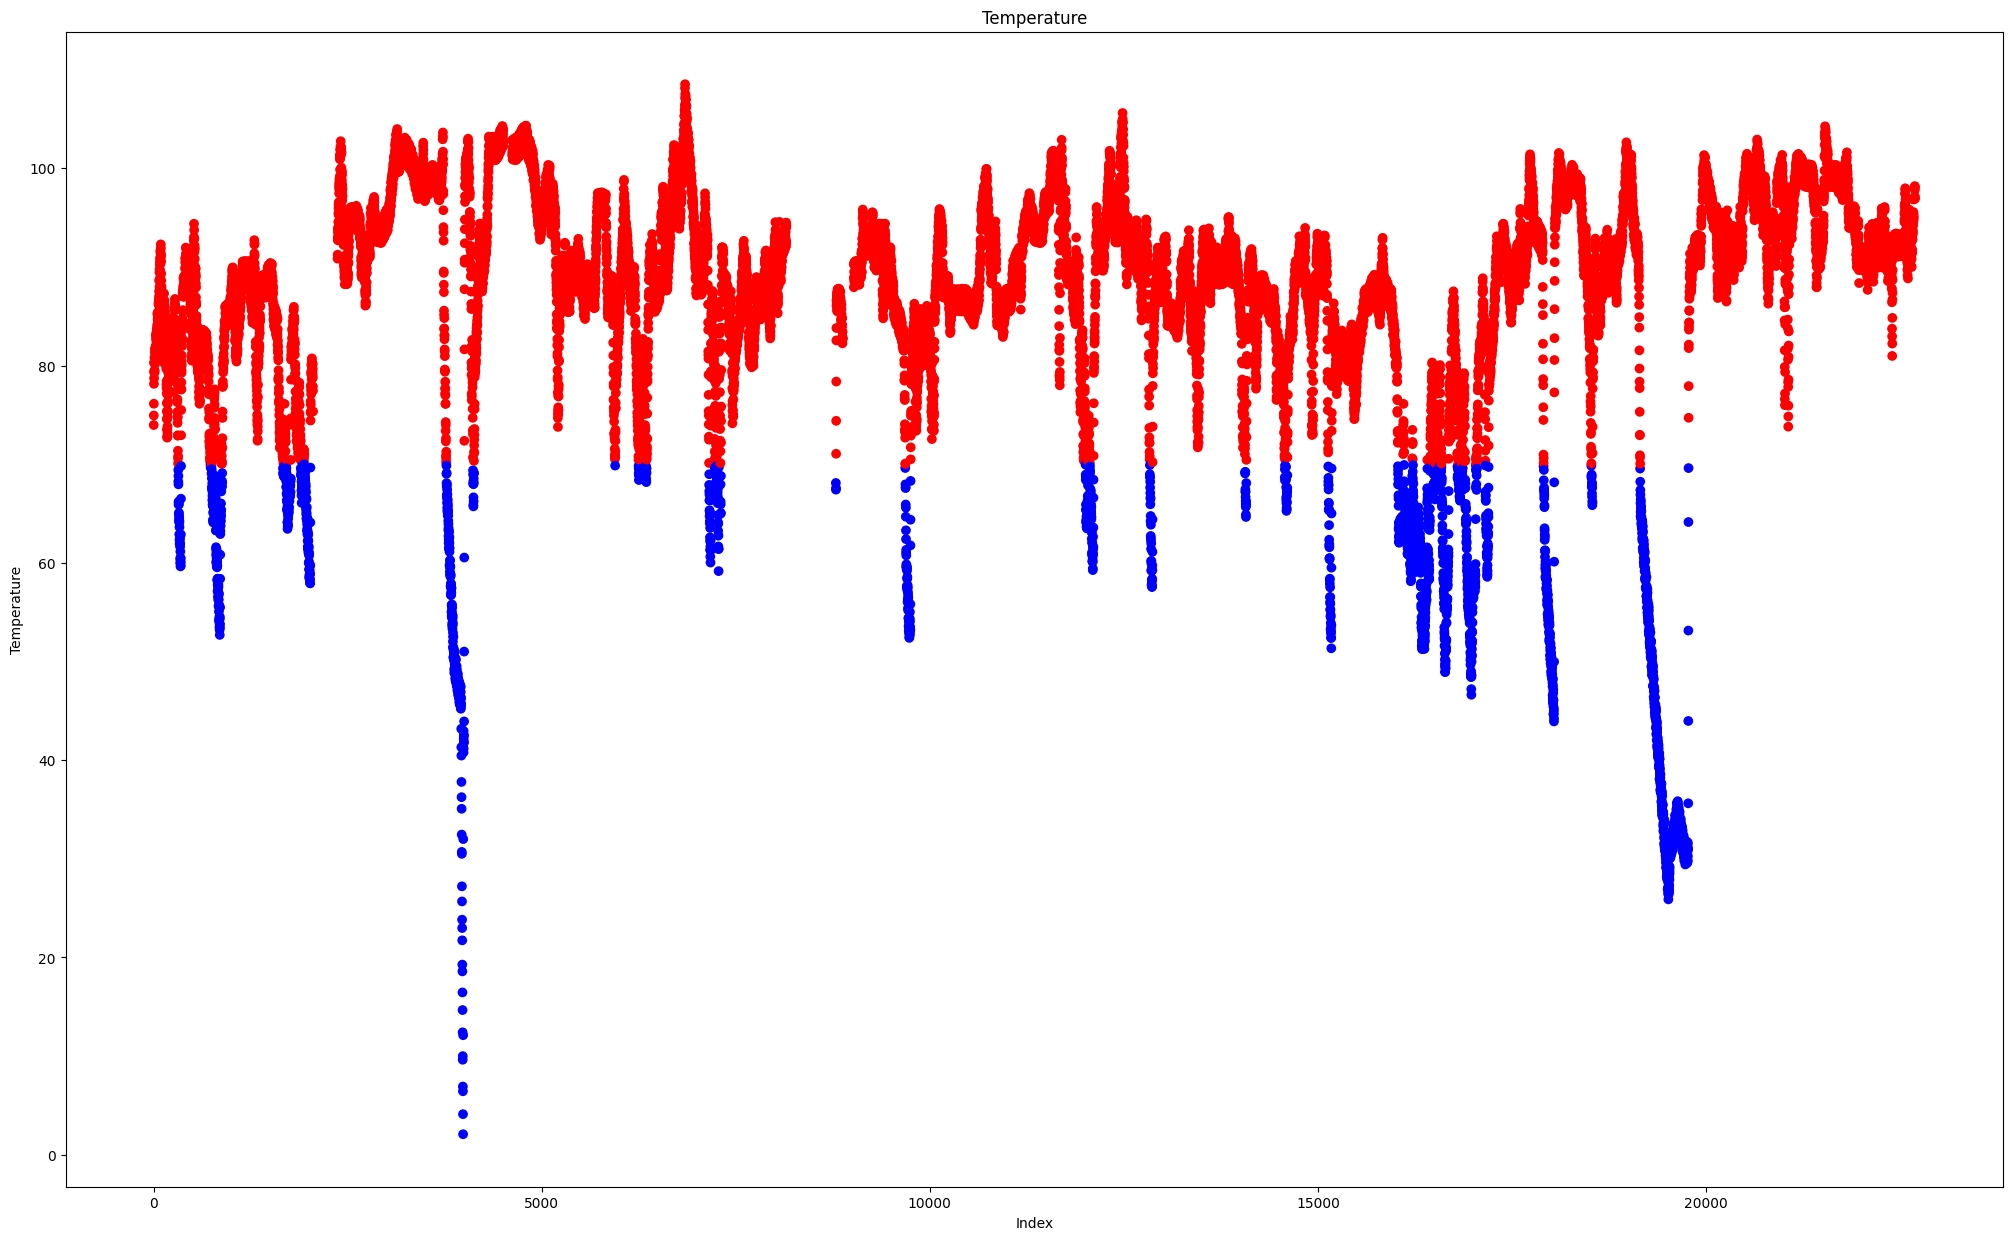

In [13]:
# Generate a plot in which temperature values greater than 70.00 are marked as red, and those below 70.00 are marked as blue.
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
file = Path("machine_temp_failure_missing.csv")
df = pd.read_csv(file)
df.rename(columns={"value": "temperature"}, inplace=True)
df['color'] = ['red' if temp > 70.00 else 'blue' for temp in df['temperature']]
plt.figure(figsize=(25, 15))
plt.scatter(df.index, df['temperature'], c=df['color'])
plt.title('Temperature')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def read_datasets():
    df1 = pd.read_csv("Machine_temp_failure_missing.csv")
    df2 = pd.read_csv("machine_temp_failure_original.csv")
    return df1, df2

def plot_dfs(df1, df2):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(df1['x'], df1['y'], 'b.')
    plt.title("Dataset 1")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 2, 2)
    plt.plot(df2['x'], df2['y'], 'r.')
    plt.title("Dataset 2")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.tight_layout()
    plt.show()

def rmse_score(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return rmse


In [ ]:
# Perform univariate imputation on temperature and  using Pandas (mean, ffill, bfill) and Scikit-Learn (SimpleImputer), and interpolation. Compare the RMSE score for each imputation with machine_temp_failure_original.csv  and find the method with the least RMSE score.
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

df = pd.read_csv('machine_temp_failure_original.csv')
df.rename(columns={"value": "temperature"}, inplace=True)

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Mean imputation
mean_imputed = temperature.fillna(temperature.mean())
mean_rmse = rmse_score(temperature, mean_imputed)

# Forward fill (ffill) imputation
ffill_imputed = temperature.fillna(method='ffill')
ffill_rmse = rmse_score(temperature, ffill_imputed)

# Backward fill (bfill) imputation
bfill_imputed = temperature.fillna(method='bfill')
bfill_rmse = rmse_score(temperature, bfill_imputed)

# SimpleImputer with mean strategy
mean_imputer = SimpleImputer(strategy='mean')
sklearn_mean_imputed = mean_imputer.fit_transform(temperature.values.reshape(-1, 1)).flatten()
sklearn_mean_rmse = rmse_score(temperature, sklearn_mean_imputed)

# SimpleImputer with forward fill strategy
ffill_imputer = SimpleImputer(strategy='constant', fill_value=None)
sklearn_ffill_imputed = ffill_imputer.fit_transform(temperature.values.reshape(-1, 1)).flatten()
sklearn_ffill_rmse = rmse_score(temperature, sklearn_ffill_imputed)

# SimpleImputer with backward fill strategy
bfill_imputer = SimpleImputer(strategy='constant', fill_value=None)
sklearn_bfill_imputed = bfill_imputer.fit_transform(temperature.values.reshape(-1, 1)).flatten()
sklearn_bfill_rmse = rmse_score(temperature, sklearn_bfill_imputed)

interpolated = temperature.interpolate()
interpolation_rmse = rmse_score(temperature, interpolated)

rmse_scores = {
    'Mean (Pandas)': mean_rmse,
    'FFill (Pandas)': ffill_rmse,
    'BFill (Pandas)': bfill_rmse,
    'Mean (Scikit-Learn)': sklearn_mean_rmse,
    'FFill (Scikit-Learn)': sklearn_ffill_rmse,
    'BFill (Scikit-Learn)': sklearn_bfill_rmse,
    'Interpolation': interpolation_rmse
}

# Find the method with the least RMSE score
best_method = min(rmse_scores, key=rmse_scores.get)
best_rmse = rmse_scores[best_method]

print("RMSE scores:")
for method, rmse in rmse_scores.items():
    print(f"{method}: {rmse}")

print(f"\nThe method with the least RMSE score is {best_method} with RMSE: {best_rmse}")


In [13]:
print(df.head())
print(df.info())
df['timestamp'] = pd.to_datetime(df["timestamp"])
df.set_index('timestamp', inplace=True)
df_hourly = df.resample('H').mean()
df_hourly = df.resample('H').mean()
print(df_hourly.head())
print(df_hourly.info())

                         value
timestamp                     
2013-12-02 21:15:00  73.967322
2013-12-02 21:20:00  74.935882
2013-12-02 21:25:00  76.124162
2013-12-02 21:30:00  78.140707
2013-12-02 21:35:00  79.329836
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22695 entries, 2013-12-02 21:15:00 to 2014-02-19 15:25:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   22695 non-null  float64
dtypes: float64(1)
memory usage: 354.6 KB
None


KeyError: 'timestamp'

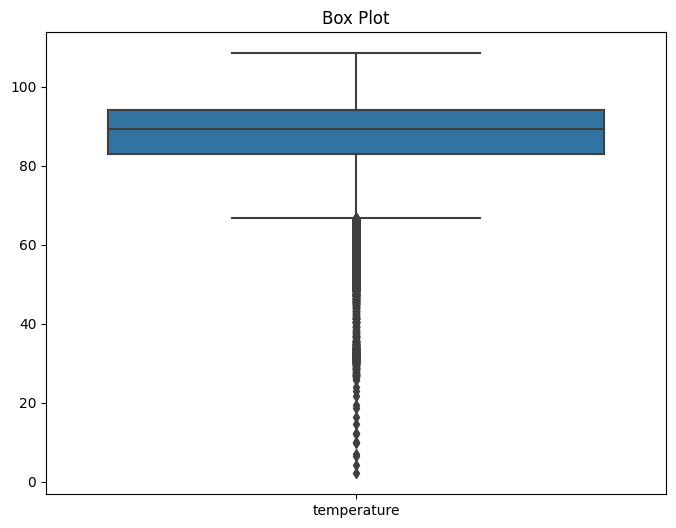

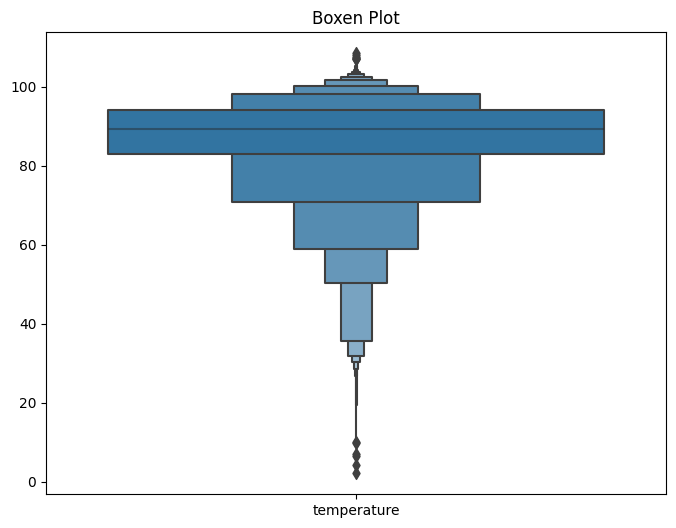

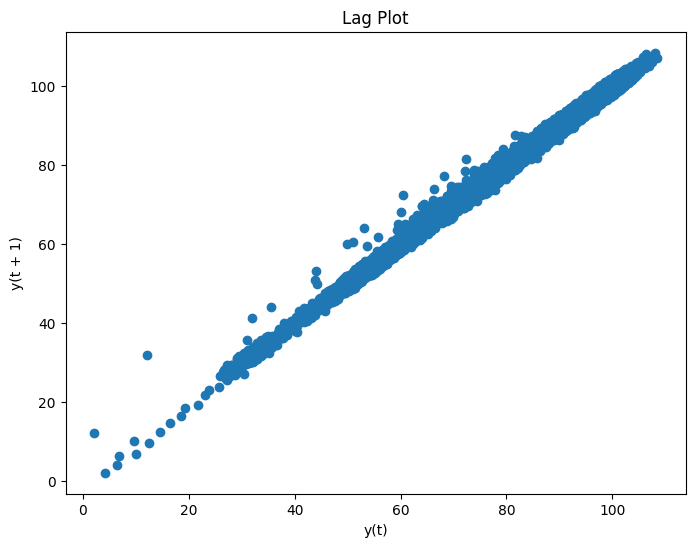

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from scipy.stats import zscore

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Box Plot')
plt.show()

# Boxen plot
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df)
plt.title('Boxen Plot')
plt.show()

# Lag plot
plt.figure(figsize=(8, 6))
lag_plot(df['temperature'])
plt.title('Lag Plot')
plt.show()

# Convert columns to numeric
numeric_cols = ['temperature']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

# Compute z-scores
df_zscore = df.apply(zscore)

# Plot z-scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_zscore)
plt.title('Z-Score Plot')
plt.show()

def iqr_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Call the function to find outliers in a specific column
outliers = iqr_outliers(df, 'temperature')
